In [11]:
#Example
import polars as pl
import plotnine as pn

In [14]:
import polars as pl

nc_births = pl.read_csv(
    "https://raw.githubusercontent.com/yardsale8/DSCI_210_R_notebooks/main/data/NC_Birth.csv",
    null_values="."
)

nc_births.head()

Father Minority,Father Age,Father Years of Education,Mother Minority,Mother Age,Mother Years of Education,Marital Status,Mother Smoker,Mother Avg Cigs,Mother Weight Gain,Birth Attendant,Mother Previous Children,Plurality of Birth,Month of Birth,Day of Birth,Gender,Number of Prenatal Visits,Kotelchuck Index for Adequacy of Prenatal Care,Gestational Age,Birth Weight (Grams),Low Birth,Apgar Score - One Minute,Apgar Score - Five Minutes
str,i64,i64,str,i64,i64,str,str,i64,i64,str,i64,str,i64,i64,str,i64,str,i64,i64,str,i64,i64
"""Nonwhite""",50,12,"""White""",24,15,"""Unmarried""","""N""",0,50,"""Physician""",1,"""Singleton""",2,23,"""Female""",10,"""3_Adequate""",38,2866,"""N""",9,9
"""White""",19,9,"""White""",18,9,"""Unmarried""","""Y""",23,35,"""Physician""",0,"""Singleton""",1,25,"""Female""",9,"""3_Adequate""",35,3121,"""N""",8,9
"""White""",37,17,"""White""",35,17,"""Married""","""N""",0,24,"""Physician""",1,"""Singleton""",1,25,"""Female""",20,"""4_AdequatePlus""",38,2667,"""N""",8,9
null,null,null,"""Nonwhite""",22,14,"""Unmarried""","""N""",0,33,"""Physician""",0,"""Singleton""",11,10,"""Male""",15,"""4_AdequatePlus""",38,2696,"""N""",8,9
"""Nonwhite""",39,11,"""Nonwhite""",31,16,"""Unmarried""","""N""",0,30,"""Physician""",0,"""Singleton""",5,18,"""Female""",12,"""1_Inadequate""",38,2979,"""N""",4,9


In [16]:
nc_births.columns

['Father Minority',
 'Father Age',
 'Father Years of Education',
 'Mother Minority',
 'Mother Age',
 'Mother Years of Education',
 'Marital Status',
 'Mother Smoker',
 'Mother Avg Cigs',
 'Mother Weight Gain',
 'Birth Attendant',
 'Mother Previous Children',
 'Plurality of Birth',
 'Month of Birth',
 'Day of Birth',
 'Gender',
 'Number of Prenatal Visits',
 'Kotelchuck Index for Adequacy of Prenatal Care',
 'Gestational  Age',
 'Birth Weight (Grams)',
 'Low Birth',
 'Apgar Score - One Minute',
 'Apgar Score - Five Minutes']

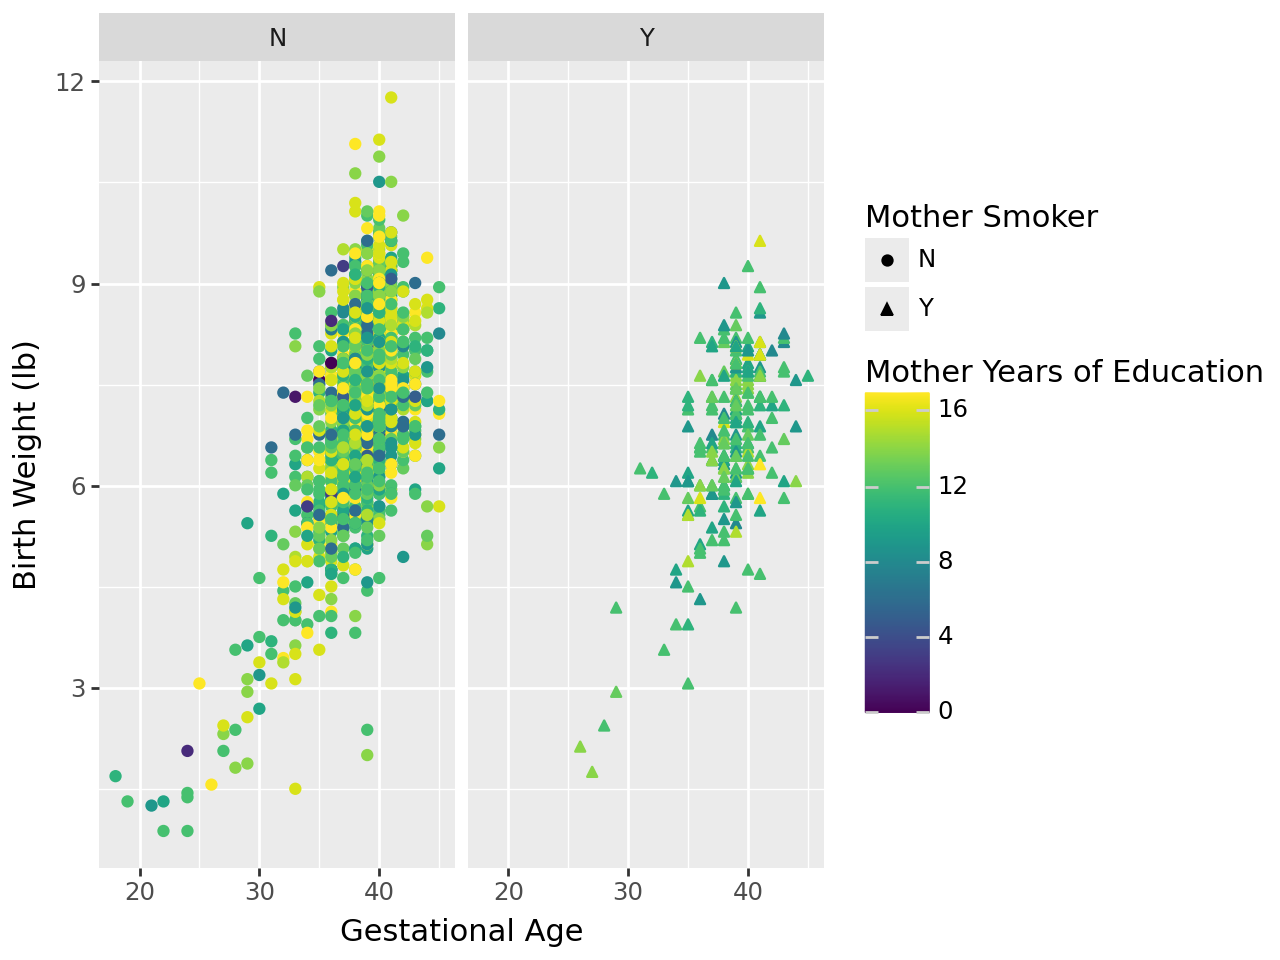

In [18]:
(
    pn.ggplot(
        nc_births
        .with_columns(
            (pl.col("Birth Weight (Grams)") / 453.59237).alias("Birth Weight (lb)")
        )
        .filter(
            pl.col("Gestational  Age").is_not_null()
            & pl.col("Birth Weight (Grams)").is_not_null()
            & pl.col("Mother Smoker").is_not_null()
            & (pl.col("Mother Smoker").cast(pl.Utf8).str.strip_chars() != "")
            & pl.col("Mother Years of Education").is_not_null()
        ),
        pn.aes(
            x="Gestational  Age",
            y="Birth Weight (lb)",
            shape="Mother Smoker",
            color="Mother Years of Education"
        )
    )
    + pn.geom_point()
    + pn.facet_grid(". ~ Mother Smoker")
    + pn.labs(x="Gestational Age", y="Birth Weight (lb)")
)

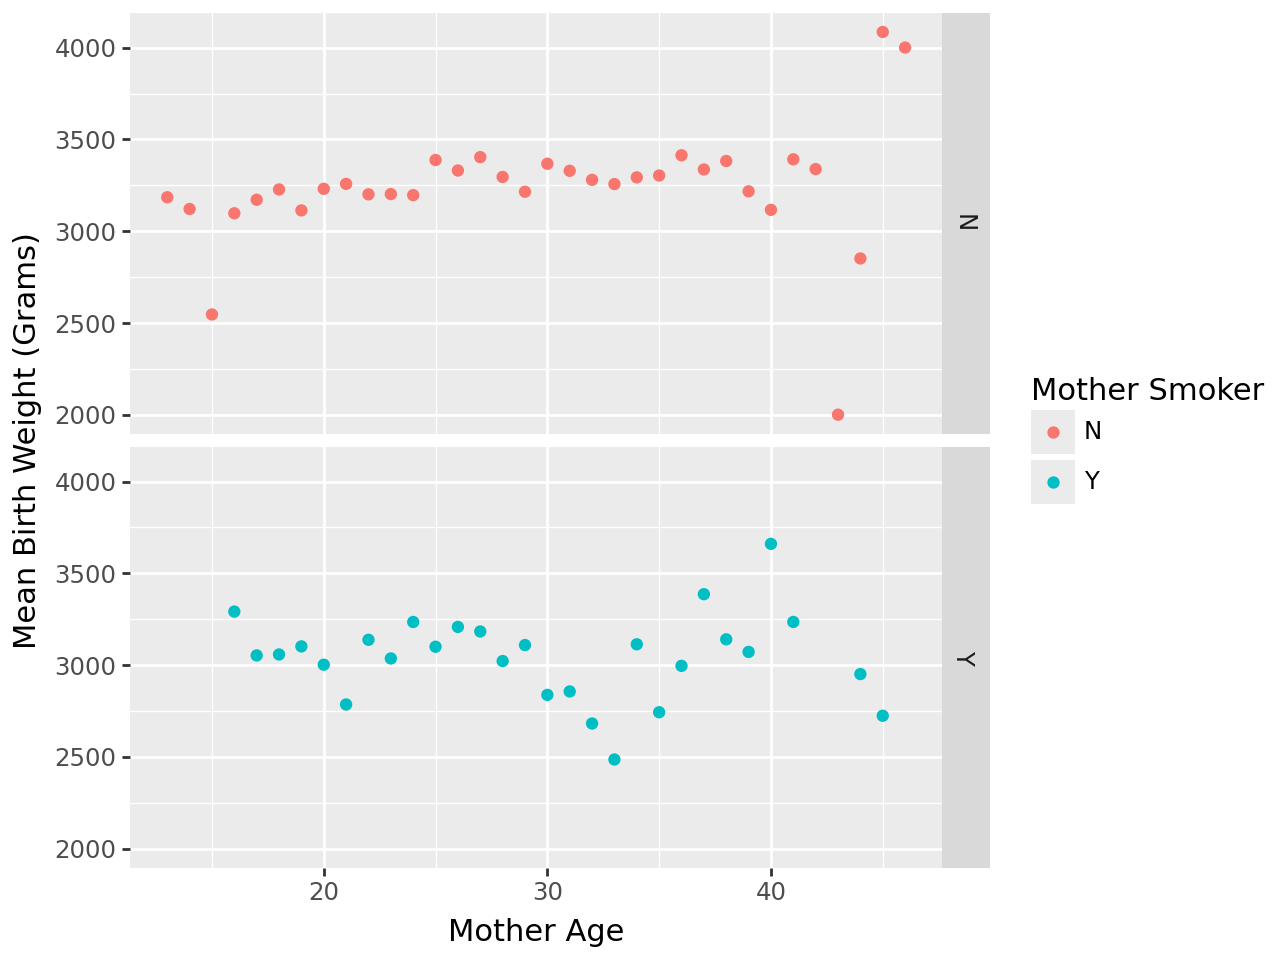

In [24]:
#Example 2.1.6
(
    pn.ggplot(
        nc_births
        .filter(
            pl.col("Mother Age").is_not_null()
            & pl.col("Birth Weight (Grams)").is_not_null()
            & pl.col("Mother Smoker").is_not_null()
            & (pl.col("Mother Smoker").cast(pl.Utf8).str.strip_chars() != "")
        )
        .group_by(["Mother Age", "Mother Smoker"])
        .agg(pl.col("Birth Weight (Grams)").mean().alias("Mean Birth Weight (Grams)")),
        pn.aes(
            x="Mother Age",
            y="Mean Birth Weight (Grams)",
            color="Mother Smoker"   # makes N and Y different colors
        )
    )
    + pn.geom_point()
    + pn.facet_grid("Mother Smoker ~ .")  # ✅ facet by smoker (N top, Y bottom)
)